# QBS 108 Assignment II

### Justin Lin

Import necessary libraries

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ParameterGrid, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

- Read in the data

In [85]:
kmeans_data = pd.read_csv('kmeans.csv')
kmeans_data = pd.DataFrame(kmeans_data)

knn_train_data = pd.read_csv('knn_train.csv')
knn_train_data = pd.DataFrame(knn_train_data)

knn_val_data = pd.read_csv('knn_val.csv')
knn_val_data = pd.DataFrame(knn_val_data)

knn_test_data = pd.read_csv('knn_test.csv')
knn_test_data = pd.DataFrame(knn_test_data)

## 1. K-Means Clustering

1)

a) Choose a suitable type of plot and visualize the data.

In [86]:
kmeans_data.head()

,X1,X2
0,3.151899,-3.131649
1,5.456249,1.390000
2,3.524860,7.633223
3,-10.446845,-3.758548
4,1.380555,-0.147269


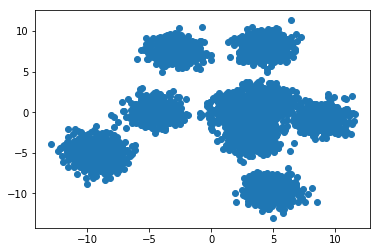

In [87]:
plt.scatter(kmeans_data['X1'],kmeans_data['X2'])

b) From your plot, how many clusters, k, would you estimate are represented in the dataset?

I estimate about 8 clusters are represented in the dataset.

2)

a) Using the k-Means algorithm, implement a clustering model.

In [88]:
x = kmeans_data.iloc[:,0:2]

kmeans_model = KMeans(n_clusters=8)

b) Train the clustering model on several reasonable values of k, taking into account your visual inspection from 1b. Plot the Bayesian information criterion (BIC) and Akaike information criterion (AIC) for each value of k.

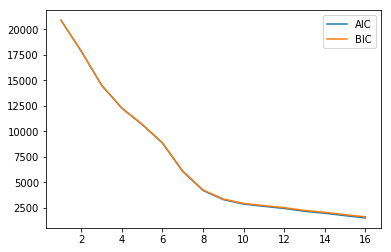

In [89]:
x = kmeans_data.iloc[:,0:2]

k = range(1,17)
AIC = []
BIC = []
for i in k:
    kmeans_model = KMeans(n_clusters=i)
    kmeans_model.fit(x)
    sse = kmeans_model.inertia_
    n = len(kmeans_data)
    aic = n*np.log(sse/n)+ 2*i
    bic = n*np.log(sse/n) + i*np.log(n)
    AIC.append(aic)
    BIC.append(bic)
plt.plot(k,AIC,label='AIC')
plt.plot(k,BIC,label='BIC')
plt.legend()

c) Which value is optimal? How does it compare to your visual inspection?

The optimal value is 8 clusters because the AIC is lowest at k = 8 and the "elbow" method shows that 8 is the optimal value. From my visual inspection, I estimated 8 clusters so I was correct.

## 2. K-Nearest Neighbor Classification

1) 

a) Train an implementation of the k-Nearest Neighbors algorithm on the training dataset of your choice of k's. Note that k here refers to the number of neighbors, not clusters.

In [90]:
knn_train_data.head()

,X1,X2,y
0,-8.349319,-5.440823,0
1,-3.346695,0.774142,1
2,3.188065,1.406896,7
3,-4.849551,-1.253043,1
4,4.971391,1.022228,7


In [91]:
x_train = knn_train_data.iloc[:,0:2]
y_train = knn_train_data.iloc[:,2]

knn = []
for i in range(1,11):
    knn_clf = KNeighborsClassifier(n_neighbors=i)
    knn_clf.fit(x_train,y_train)
    knn.append(knn_clf)
print(knn)

[KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform'), KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform'), KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform'), KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform'), KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'), KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='un

b) Report the classification accuracy of this model on the validation set for different values for k. Plot these accuracies against k and report the optimal value for k.

In [92]:
knn_val_data.head()

,X1,X2,y
0,2.778149,-4.603808,5
1,9.931873,1.835772,4
2,-7.556834,-5.323416,0
3,10.163880,0.622421,4
4,-8.041507,-5.948700,0


[0.89125, 0.88625, 0.90625, 0.90875, 0.91625, 0.91, 0.9175, 0.91, 0.9175, 0.9175, 0.91625, 0.915, 0.91625, 0.91625, 0.9175, 0.91625, 0.9225, 0.91625, 0.91625, 0.9125, 0.91625, 0.915, 0.9125, 0.9125, 0.915, 0.9125, 0.915, 0.9125, 0.9125, 0.91125]
0.9225


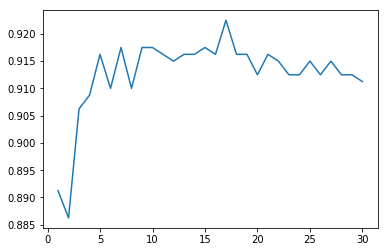

In [93]:
x_val = knn_val_data.iloc[:,0:2]
y_val = knn_val_data.iloc[:,2]

accuracy = []
for i in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_val)
    acc = accuracy_score(y_val,y_pred)
    accuracy.append(acc)
print(accuracy)
plt.plot(range(1,31),accuracy)
print(max(accuracy))

The optimal value for k is 17 with an accuracy of 0.9225.

c) Report the classification accuracy of this model on the data in knn_test.csv using the optimal value of k that you found in 1b.

In [94]:
x_test = knn_test_data.iloc[:,0:2]
y_test = knn_test_data.iloc[:,2]

knn_test = KNeighborsClassifier(n_neighbors=17)
knn_test.fit(x_val,y_val)
y_pred = knn_test.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.91


The classification accuracy is 0.91.

**In the remaining problems, you will implement several classifiers to predict whether a passenger from the Titanic can survive based on their information.**

Training and validation set contains features and a ground-truth target label for each datapoint. Testing set contains only features, while the ground-truth label is not provided.

- Read in the data

In [95]:
titanic_train_data = pd.read_csv('titanic_train.csv')
titanic_train_data = pd.DataFrame(titanic_train_data)

titanic_val_data = pd.read_csv('titanic_val.csv')
titanic_val_data = pd.DataFrame(titanic_val_data)

titanic_test_data = pd.read_csv('titanic_test.csv')
titanic_test_data = pd.DataFrame(titanic_test_data)

In [96]:
titanic_train_data.head()

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,Has_Cabin,FamilySize,IsAlone,Title
0,1,1,0,24,0,69.3000,1,1,1,1,3
1,0,3,0,3,1,21.0750,0,0,5,0,4
2,1,3,0,16,0,7.7333,2,0,1,1,4
3,1,3,1,32,0,56.4958,0,0,1,1,1
4,0,3,1,22,0,7.1250,0,0,1,1,1


In [97]:
titanic_val_data.head()

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,Has_Cabin,FamilySize,IsAlone,Title
0,1,3,0,24,0,15.8500,0,0,2,0,3
1,1,2,0,24,0,13.0000,0,1,1,1,4
2,0,3,1,40,1,15.5000,2,0,3,0,1
3,1,3,1,33,0,23.2500,2,0,3,0,1
4,1,2,0,3,2,41.5792,1,0,4,0,4


In [98]:
titanic_test_data.head()

,Pclass,Sex,Age,Parch,Fare,Embarked,Has_Cabin,FamilySize,IsAlone,Title
0,3,1,27,1,15.2458,1,0,3,0,2
1,2,1,31,0,10.5000,0,0,1,1,1
2,3,1,20,0,7.9250,0,0,1,1,1
3,2,0,6,1,33.0000,0,0,2,0,4
4,3,0,14,0,11.2417,1,0,2,0,4


I transformed the data where I believe the variable **Pclass**, **Embarked** and **Title** are ordinal categorical variables. My reasoning is that does ticket class (1,2,3), the port of embarkation (Southampton, Cherbourg, and Queenstown) and passengers' title (Mr., Master., Mrs., Miss., and Rare) contribute to that passenger's survival outcome. For example, if a passenger from Southampton with a ticket class of 1 that has a title of Master, is he or she more likely to survive?

In [99]:
titanic_train_data_t = pd.get_dummies(titanic_train_data,prefix=['Pclass','Embarked','Title'],columns=['Pclass','Embarked','Title'],drop_first=True)
titanic_train_data_t.head()

,Survived,Sex,Age,Parch,Fare,Has_Cabin,FamilySize,IsAlone,Pclass_2,Pclass_3,Embarked_1,Embarked_2,Title_2,Title_3,Title_4,Title_5
0,1,0,24,0,69.3000,1,1,1,0,0,1,0,0,1,0,0
1,0,0,3,1,21.0750,0,5,0,0,1,0,0,0,0,1,0
2,1,0,16,0,7.7333,0,1,1,0,1,0,1,0,0,1,0
3,1,1,32,0,56.4958,0,1,1,0,1,0,0,0,0,0,0
4,0,1,22,0,7.1250,0,1,1,0,1,0,0,0,0,0,0


In [100]:
titanic_val_data_t = pd.get_dummies(titanic_val_data,prefix=['Pclass','Embarked','Title'],columns=['Pclass','Embarked','Title'],drop_first=True)
# validation data set does not have title 5
titanic_val_data_t['Title_5'] = 0 # added a Title_5 column filled with zeros otherwise running validation model on testing data won't work (incorrect number of dimensions)
titanic_val_data_t.head()

,Survived,Sex,Age,Parch,Fare,Has_Cabin,FamilySize,IsAlone,Pclass_2,Pclass_3,Embarked_1,Embarked_2,Title_2,Title_3,Title_4,Title_5
0,1,0,24,0,15.8500,0,2,0,0,1,0,0,0,1,0,0
1,1,0,24,0,13.0000,1,1,1,1,0,0,0,0,0,1,0
2,0,1,40,1,15.5000,0,3,0,0,1,0,1,0,0,0,0
3,1,1,33,0,23.2500,0,3,0,0,1,0,1,0,0,0,0
4,1,0,3,2,41.5792,0,4,0,1,0,1,0,0,0,1,0


In [101]:
titanic_test_data_t = pd.get_dummies(titanic_test_data,prefix=['Pclass','Embarked','Title'],columns=['Pclass','Embarked','Title'],drop_first=True)
titanic_test_data_t.head()

,Sex,Age,Parch,Fare,Has_Cabin,FamilySize,IsAlone,Pclass_2,Pclass_3,Embarked_1,Embarked_2,Title_2,Title_3,Title_4,Title_5
0,1,27,1,15.2458,0,3,0,0,1,1,0,1,0,0,0
1,1,31,0,10.5000,0,1,1,1,0,0,0,0,0,0,0
2,1,20,0,7.9250,0,1,1,0,1,0,0,0,0,0,0
3,0,6,1,33.0000,0,2,0,1,0,0,0,0,0,1,0
4,0,14,0,11.2417,0,2,0,0,1,1,0,0,0,1,0


## 3. Decision Tree Classification

With the Titanic data:

1)

a) How many datapoints are in the training, validation, and testing sets? How many features are available for each datapoint?

In [102]:
print(titanic_train_data.shape)
print(titanic_val_data.shape)
print(titanic_test_data.shape)

(498, 11)
(125, 11)
(268, 10)


There are 498 datapoints with 10 features in the training set (the Survived column is not a feature).

There are 125 datapoints with 10 features in the validation set (the Survived column is not a feature).

There are 268 datapoints with 10 features in the test set.

b) What is the average age of the passengers and average fare paid from the training samples?

In [103]:
age = sum(titanic_train_data['Age'])/len(titanic_train_data)
print('The average of the passengers is {0} years old.'.format(round(age,0)))
fare = sum(titanic_train_data['Fare'])/len(titanic_train_data)
print('The average fare paid is ${0}.'.format(round(fare,2)))

The average of the passengers is 29.0 years old.
The average fare paid is $30.34.


2)

a) Implement a binary decision tree model for the training data (Hint: `DecisionTreeClassifier` from scikit-learn)

Here I normalize the data as part of my data preprocessing.

In [127]:
scaler = StandardScaler()

x_train = scaler.fit_transform(titanic_train_data_t.iloc[:,1:16])
y_train = titanic_train_data_t['Survived']
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

b) There are a number of hyperparameters you can tune to improve your model, one of which is the criteria for ending the splitting process. Two common ways of terminating the splitting process are maximum depth of the tree or minimum number of samples left. **Tune the maximum depth of the tree** (e.g. from 1 to 10) by reporting the accuracy of the classifier in 2a on the validation set for different settings of maximum depth. Plot your findings and report the optimum maximum depth you found.

[0.808, 0.792, 0.832, 0.84, 0.792, 0.816, 0.792, 0.808, 0.776, 0.752, 0.76, 0.76, 0.752, 0.76, 0.744, 0.76, 0.752, 0.752, 0.752, 0.736, 0.752, 0.752, 0.768, 0.752, 0.76, 0.752, 0.768, 0.752, 0.752, 0.768]
0.84


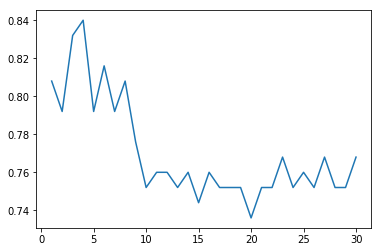

In [129]:
scaler = StandardScaler()
x_val = scaler.fit_transform(titanic_val_data_t.iloc[:,1:16])
y_val = titanic_val_data_t['Survived']

accuracy = []
for i in range(1,31):
    dtc = DecisionTreeClassifier(max_depth=i)
    dtc.fit(x_train,y_train)
    y_pred = dtc.predict(x_val)
    acc = accuracy_score(y_val,y_pred)
    accuracy.append(acc)
print(accuracy)
plt.plot(range(1,31),accuracy)
print(max(accuracy))

The optimum maximum depth I found is 4 with an accuracy of 0.84.

c) Train a decision tree classifier using the optimum setting of maximum depth found in 2b on all data from training and validation set. Predict the outcomes on the testing data, and submit your prediction result (0's and 1's) in a .csv file named "YourNetID_dt_prediction.csv". Do not include index and header.

In [123]:
scaler = StandardScaler()
x_val = scaler.fit_transform(titanic_val_data_t.iloc[:,1:16])
y_val = titanic_val_data_t['Survived']
x_test = scaler.fit_transform(titanic_test_data_t.iloc[:,0:15])

dtc_test = DecisionTreeClassifier(max_depth=4)
dtc_test.fit(x_val,y_val)
pred_surv = dtc_test.predict(x_test)
print(pred_surv)
pred_surv = pd.DataFrame(pred_surv)
pred_surv.to_csv('dt_prediction.csv',index=False,header=False)

[0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1
 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 1 0 1 0 0 0 0 0]


In [107]:
print(len(pred_surv))
print(len(titanic_test_data))

268
268


## 4. Random Forest Classification

1) Initialize a random forest classifier.(Hint: use `RandomForestClassifier` from scikit-learn)

In [108]:
scaler = StandardScaler()
x_train = scaler.fit_transform(titanic_train_data_t.iloc[:,1:16])
y_train = titanic_train_data_t['Survived']

rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

2) Optimize your classifier by tuning two hyperparameters to maximize the accuracy of your model: **the maximum depth of the tree**, and **the number of trees** in the random forest classifier. Validate the model by using 10-fold cross-validation on the entire data combining training and validation set (Hint: use `ParameterGrid` and `GridSearchCV` from scikit-learn). Report the optimum parameters you found.

In [109]:
titanic_tv = pd.concat([titanic_train_data_t,titanic_val_data_t],axis=0)
titanic_tv.head()

,Survived,Sex,Age,Parch,Fare,Has_Cabin,FamilySize,IsAlone,Pclass_2,Pclass_3,Embarked_1,Embarked_2,Title_2,Title_3,Title_4,Title_5
0,1,0,24,0,69.3000,1,1,1,0,0,1,0,0,1,0,0
1,0,0,3,1,21.0750,0,5,0,0,1,0,0,0,0,1,0
2,1,0,16,0,7.7333,0,1,1,0,1,0,1,0,0,1,0
3,1,1,32,0,56.4958,0,1,1,0,1,0,0,0,0,0,0
4,0,1,22,0,7.1250,0,1,1,0,1,0,0,0,0,0,0


In [110]:
print(len(titanic_tv))

623


In [111]:
scaler = StandardScaler()
x_tv = scaler.fit_transform(titanic_tv.iloc[:,1:16])
y_tv = titanic_tv['Survived']

parameters = {'max_depth':np.linspace(1,10,10).astype("int"),
             'n_estimators':np.linspace(1,50,50).astype("int")}
rfc = RandomForestClassifier(random_state=100)
clf = GridSearchCV(rfc,parameters,cv=10)
clf.fit(x_tv,y_tv)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=100, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), 'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [112]:
print(clf.best_params_)

{'max_depth': 8, 'n_estimators': 16}


In [113]:
print(clf.best_score_)

0.8475120385232745


3) Predict the survivals on the testing data using the classifier with the optimum parameters from 2b. Predict the outcomes on titanic_test.csv, and submit your prediction result (0's and 1's) in a .csv file named "YourNetID_rf_prediction.csv". Do not include index and header.

In [132]:
scaler = StandardScaler()

x_test = scaler.fit_transform(titanic_test_data_t.iloc[:,0:15])

pred_surv = clf.predict(x_test)
print(pred_surv)
pred_surv = pd.DataFrame(pred_surv)
pred_surv.to_csv('rf_prediction.csv',index=False,header=False)

[1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1
 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 1 1 1 0 0 0 0 0]


In [115]:
print(len(pred_surv))
print(len(titanic_test_data))

268
268


## 5. SVM Classification

1) Build SVM classifiers with the following 3 kernels: linear, polynomial with degree = 2, and radial basis function kernel. Train the classifiers and calculate the performance of each classifier on the validation set(Hint: use `SVC` and `Kernel functions` from scikit-learn)

In [126]:
scaler = StandardScaler()
x_train = scaler.fit_transform(titanic_train_data_t.iloc[:,1:16])
y_train = titanic_train_data_t['Survived']

x_val = scaler.fit_transform(titanic_val_data_t.iloc[:,1:16])
y_val = titanic_val_data_t['Survived']

clf_linear = SVC(kernel='linear')
clf_linear.fit(x_train,y_train)
y_pred_lin = clf_linear.predict(x_val)
accuracy_linear = accuracy_score(y_val,y_pred_lin)
print('The accuracy for the SVM classifier with a linear kernel is:',accuracy_linear)

clf_poly = SVC(kernel='poly',degree=2)
clf_poly.fit(x_train,y_train)
y_pred_poly = clf_poly.predict(x_val)
accuracy_poly = accuracy_score(y_val,y_pred_poly)
print('The accuracy for the SVM classifier with a polynomial of degree 2 kernel is:',accuracy_poly)

clf_rbf = SVC(kernel='rbf')
clf_rbf.fit(x_train,y_train)
y_pred_rbf = clf_rbf.predict(x_val)
accuracy_rbf = accuracy_score(y_val,y_pred_rbf)
print('The accuracy for the SVM classifier with a radial basis function kernel is:',accuracy_rbf)

The accuracy for the SVM classifier with a linear kernel is: 0.848
The accuracy for the SVM classifier with a polynomial of degree 2 kernel is: 0.896
The accuracy for the SVM classifier with a radial basis function kernel is: 0.872


2) Which kernel gives the optimum result? Use your classifier with this kernel to predict the survival outcomes in the testing set. Save your prediction (0's and 1's) in a .csv file named "YourNetID_svm_prediction.csv". Do not include index and header.

The polynomial of degree 2 kernel gave the optimum result.

In [133]:
scaler = StandardScaler()
x_val = scaler.fit_transform(titanic_val_data_t.iloc[:,1:16])
y_val = titanic_val_data_t['Survived']

x_test = scaler.fit_transform(titanic_test_data_t.iloc[:,0:15])

clf_poly.fit(x_val,y_val)
pred_surv = clf_poly.predict(x_test)
print(pred_surv)
pred_surv = pd.DataFrame(pred_surv)
pred_surv.to_csv('svm_prediction.csv',index=False,header=False)

[1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1
 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 1 0 0 0 0 0]


In [118]:
print(len(pred_surv))
print(len(titanic_test_data))

268
268
